In [48]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from classification_utils import *

In [49]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [50]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [51]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [52]:
#check if there is any null value
data.isnull().values.any()

False

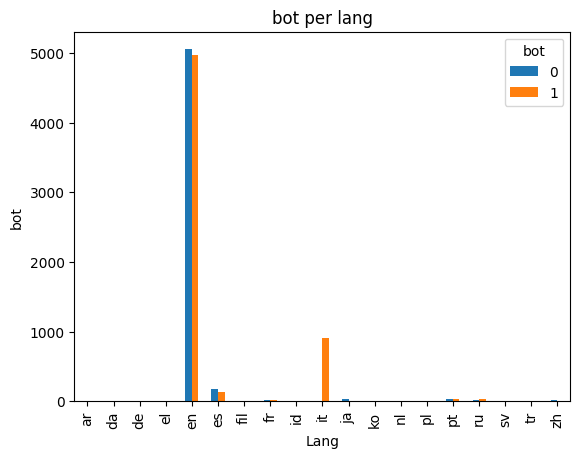

In [53]:
plot_lang_hist(data)

In [54]:
data = discretize_data(data, ["lang"])

In [55]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [56]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [57]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
1580244270,291,89.350191,21.631766,0.175232,0.000000,0.316566,0.000000,0.000000,0.000000,0.022963,0.241912,3.964351,0.008748,0.183907,4
521336735,291,78.223536,17.005911,0.005109,0.000537,0.000000,0.000000,0.000000,0.000000,0.009941,0.107024,3.498516,0.008329,0.379747,4
138637933,7,65.340909,14.694444,0.246429,0.198571,0.265714,0.000000,0.000000,0.000000,0.484286,1.066923,5.794932,0.268571,0.662796,4
616349387,42,67.387755,16.510204,0.020408,0.000000,0.081633,0.040816,0.197864,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,4
1552229736,8,55.204961,11.270670,0.074848,0.928198,0.046127,0.000000,0.000000,0.000000,0.045752,2.159911,6.086640,0.043478,64.569508,4


In [58]:
train_label.head()

1580244270    1
521336735     1
138637933     0
616349387     1
1552229736    0
Name: bot, dtype: int64

### Usage of Lang

In [12]:
# To use GaussianNB we have to have gaussian distributed data, so apply standard scaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [13]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_X)
test_pred_gnb = gnb.predict(test_X)

In [14]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8338919925512104
Accuracy test set  0.840139009556907
Precision train set  0.862046791643604
Recall train set  0.8338919925512104
F1 score train set  0.8287199316088625
Support train set  (array([0.96595256, 0.77044661]), array([0.6690514 , 0.97921046]), array([0.79054477, 0.862374  ]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.68      0.80      1618
         >50       0.78      0.98      0.87      1835

    accuracy                           0.84      3453
   macro avg       0.87      0.83      0.83      3453
weighted avg       0.87      0.84      0.84      3453



In [16]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.00222166379292806
Score time  0.0010030269622802734
Test score  0.8342644320297952
Train score  0.8345127250155183


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


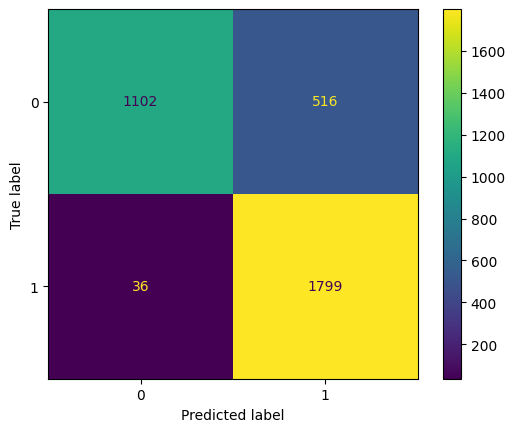

In [17]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_X, test_label)
plt.show() 

In [18]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

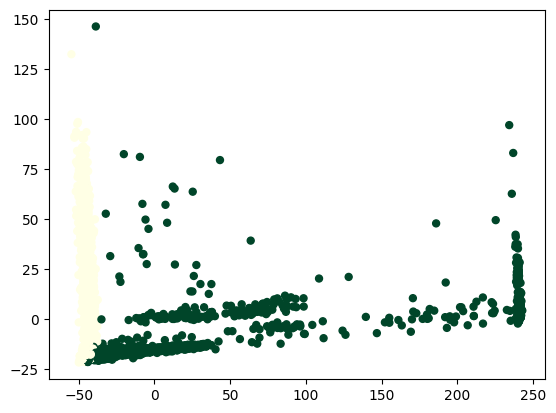

In [19]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

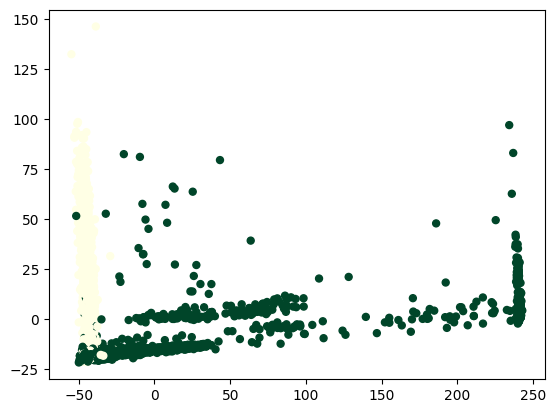

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');

### How lang is biased

In [25]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [26]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
270710696,11,71.177008,15.483481,0.055869,0.692184,0.021488,0.000000,0.0,0.0,0.063658,0.291298,5.239529,7.352404,35.568329,4
2351935423,4,69.264901,15.543046,0.000000,0.258278,0.033113,0.000000,0.0,0.0,0.019868,0.139545,1.098612,0.033113,0.178931,4
334826952,291,77.940591,16.942473,0.005109,0.000000,0.000000,0.000000,0.0,0.0,0.019624,0.144400,4.233488,0.006989,0.083309,4
34160482,8,89.829535,20.786691,0.163628,0.360529,0.278031,0.000000,0.0,0.0,0.022789,0.160986,3.818380,8.229717,44.118492,4
429417419,10,45.903936,10.101294,0.195706,0.796312,0.128819,0.022296,0.0,0.0,0.089733,0.368281,5.539803,10.180017,48.181104,4


In [27]:
non_bot_users_X = scaler.transform(non_bot_users.values)

In [28]:
gnb.predict(non_bot_users_X).sum()/total_bot

0.3189122373300371

In [30]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    modified_non_bot_users_X = scaler.transform(modified_non_bot_users.values)
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users_X).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.31087762669962915
number bot classified with lang_num = 9 : 0.3695920889987639
number bot classified with lang_num = 7 : 0.34487021013597036
number bot classified with lang_num = 15 : 0.507416563658838
number bot classified with lang_num = 5 : 0.32138442521631644
number bot classified with lang_num = 17 : 0.6131025957972805
number bot classified with lang_num = 14 : 0.46786155747836833
number bot classified with lang_num = 12 : 0.41409147095179233
number bot classified with lang_num = 8 : 0.35661310259579726
number bot classified with lang_num = 18 : 0.669344870210136
number bot classified with lang_num = 10 : 0.3819530284301607
number bot classified with lang_num = 2 : 0.32447466007416564
number bot classified with lang_num = 11 : 0.3967861557478368
number bot classified with lang_num = 1 : 0.3368355995055624
number bot classified with lang_num = 0 : 0.34857849196538937
number bot classified with lang_num = 13 : 0.4363411619283066
number bot

### Removed Lang attribute for classification

In [31]:
del train_set["lang_num"]

In [33]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
732621438,9,36.574847,14.694444,0.008147,0.468432,0.016802,0.0,0.000000,0.000000,0.045752,1.318589,6.264491,4.282587,32.200399
616640000,26,61.468750,13.312500,0.000000,0.000000,0.281250,0.0,0.242061,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
1208381976,1,44.200000,14.694444,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2281067444,291,85.640674,18.232877,0.029505,0.004215,0.077450,0.0,0.000000,0.000000,0.045752,0.230747,6.902753,1.010537,2.393109
2378652246,47,59.315217,12.869565,0.000000,0.369565,0.065217,0.0,0.000000,0.000000,0.097826,0.297079,2.197225,0.054348,0.226703


In [34]:
del test_set["lang_num"]

In [35]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
270710696,11,71.177008,15.483481,0.055869,0.692184,0.021488,0.000000,0.0,0.0,0.063658,0.291298,5.239529,7.352404,35.568329
2351935423,4,69.264901,15.543046,0.000000,0.258278,0.033113,0.000000,0.0,0.0,0.019868,0.139545,1.098612,0.033113,0.178931
334826952,291,77.940591,16.942473,0.005109,0.000000,0.000000,0.000000,0.0,0.0,0.019624,0.144400,4.233488,0.006989,0.083309
34160482,8,89.829535,20.786691,0.163628,0.360529,0.278031,0.000000,0.0,0.0,0.022789,0.160986,3.818380,8.229717,44.118492
429417419,10,45.903936,10.101294,0.195706,0.796312,0.128819,0.022296,0.0,0.0,0.089733,0.368281,5.539803,10.180017,48.181104


In [36]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [37]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_X)
test_pred_gnb = gnb2.predict(test_X)

In [38]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8276846679081316
Accuracy test set  0.8349261511728931
Precision train set  0.8576513535477946
Recall train set  0.8276846679081316
F1 score train set  0.8219551177783504
Support train set  (array([0.96420233, 0.76371923]), array([0.65659777, 0.97850969]), array([0.78121059, 0.85787426]), array([3774, 4281]))


In [39]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.67      0.79      1618
         >50       0.77      0.98      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.87      0.83      0.83      3453
weighted avg       0.86      0.83      0.83      3453



In [40]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0028537114461263022
Score time  0.0016960302988688152
Test score  0.8279329608938547
Train score  0.8271880819366854


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


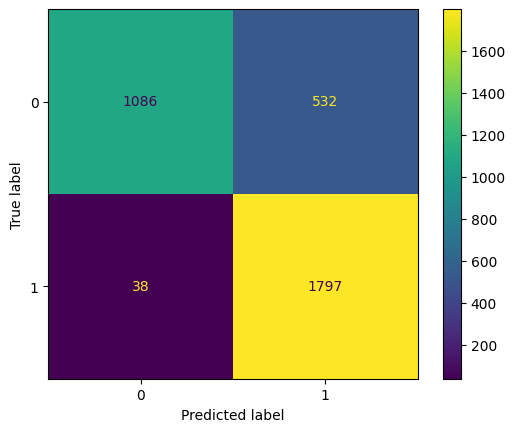

In [41]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_X, test_label)
plt.show() 

In [42]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

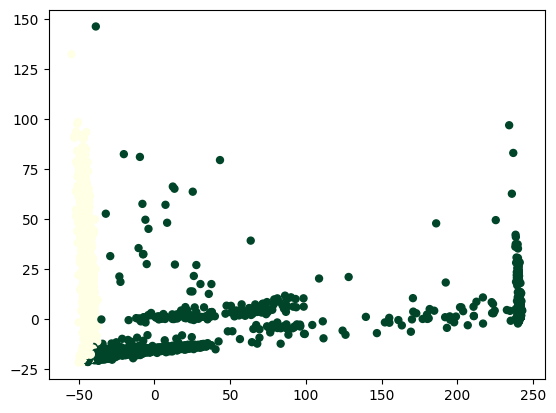

In [43]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

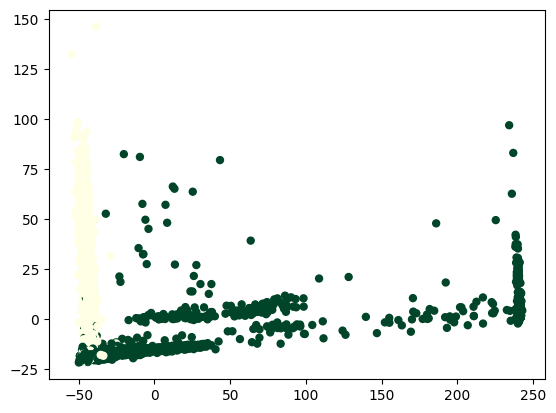

In [45]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');